In [1]:
%load_ext autoreload
%autoreload 2
%load_ext nb_black
import pandas as pd
import numpy as np
import scprep
import graphtools
import os
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [2]:
figsize = (6, 4)
FIGPATH = "/home/mila/a/alexander.tong/mila/1_cell_trajectories/TrajectoryNet-private/data/figures/"

<IPython.core.display.Javascript object>

In [3]:
adata = sc.read(os.path.join(FIGPATH, "rna", "adata_v3.h5ad"))
rna_traj = pd.read_pickle(os.path.join(FIGPATH, "rna", "traj_df.pkl"))
traj_df_apoptotic = pd.read_pickle(os.path.join(FIGPATH, "rna", "traj_apoptotic.pkl"))
traj_df_epithelial = pd.read_pickle(os.path.join(FIGPATH, "rna", "traj_epithelial.pkl"))
traj_df_mesenchymal = pd.read_pickle(
    os.path.join(FIGPATH, "rna", "traj_mesenchymal.pkl")
)


<IPython.core.display.Javascript object>

In [5]:
adata[adata.obs["day"] == 30].obs.groupby("louvain").count()

,n_counts,batch,day,new,sample_id,growth,log_growth,sample_labels,S_score,G2M_score,phase,emt_scores,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
louvain,,,,,,,,,,,,,,,,,,,,
0,6,6,6,6,6,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6
1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1628,1628,1628,1628,1628,0,0,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628
3,8,8,8,8,8,0,0,8,8,8,8,8,8,8,8,8,8,8,8,8
4,5,5,5,5,5,0,0,5,5,5,5,5,5,5,5,5,5,5,5,5
7,5,5,5,5,5,0,0,5,5,5,5,5,5,5,5,5,5,5,5,5
8,922,922,922,922,922,0,0,922,922,922,922,922,922,922,922,922,922,922,922,922
9,10,10,10,10,10,0,0,10,10,10,10,10,10,10,10,10,10,10,10,10
10,2,2,2,2,2,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2


<IPython.core.display.Javascript object>

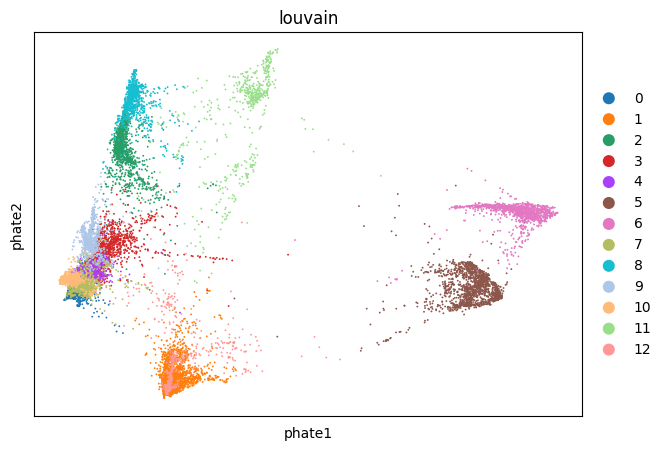

<IPython.core.display.Javascript object>

In [6]:
sc.pl.scatter(adata, basis="phate", color="louvain")

In [7]:
rna_traj = rna_traj.groupby("timepoints").mean().T

<IPython.core.display.Javascript object>

In [8]:
# These are somehow switched and are labeled incorrectly, switching here
traj_mes = traj_df_epithelial.groupby("timepoints").mean().T
traj_epi = traj_df_mesenchymal.groupby("timepoints").mean().T

<IPython.core.display.Javascript object>

In [9]:
scaled_rna_traj = pd.DataFrame(StandardScaler().fit_transform(rna_traj.T)).T
scaled_rna_traj.index = adata.var.index

<IPython.core.display.Javascript object>

In [10]:
scaled_rna_traj

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
AL627309.1,-1.783965,-1.549618,-1.297907,-1.033826,-0.762627,-0.489230,-0.217983,0.047420,0.303931,0.549107,...,-0.958954,-0.972095,-0.982184,-0.989133,-0.992925,-0.993601,-0.991261,-0.986036,-0.978090,-0.967606
AL669831.5,-1.698555,-1.506323,-1.299143,-1.080331,-0.853562,-0.622362,-0.389887,-0.158862,0.068418,0.290001,...,-0.941096,-0.929536,-0.914178,-0.895017,-0.872100,-0.845531,-0.815449,-0.782023,-0.745441,-0.705910
FAM87B,-0.586078,-0.453026,-0.309345,-0.157434,0.000041,0.160524,0.321758,0.481797,0.638980,0.791874,...,-0.849811,-0.811981,-0.771289,-0.727837,-0.681765,-0.633215,-0.582349,-0.529334,-0.474342,-0.417538
LINC00115,-3.593699,-3.192619,-2.762513,-2.315751,-1.865225,-1.422827,-0.998426,-0.599332,-0.230255,0.106393,...,-0.277306,-0.254831,-0.231949,-0.208893,-0.185903,-0.163225,-0.141107,-0.119798,-0.099545,-0.080583
FAM41C,-2.315758,-2.155190,-1.987219,-1.813922,-1.637335,-1.459287,-1.281328,-1.104743,-0.930598,-0.759754,...,-1.311255,-1.410733,-1.510126,-1.609288,-1.708148,-1.806647,-1.904778,-2.002550,-2.100009,-2.197201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AL592183.1,-0.596963,-0.461028,-0.315389,-0.162130,-0.003531,0.158224,0.321182,0.483608,0.643944,0.800769,...,-0.876679,-0.854261,-0.829674,-0.802908,-0.773995,-0.742960,-0.709855,-0.674734,-0.637664,-0.598712
AC007325.4,-2.829684,-2.708114,-2.580469,-2.448691,-2.314656,-2.180032,-2.046151,-1.913964,-1.784041,-1.656638,...,-0.302975,-0.370671,-0.438282,-0.505729,-0.572966,-0.639973,-0.706749,-0.773315,-0.839707,-0.905967
AL354822.1,0.467493,0.372415,0.272674,0.169645,0.064784,-0.040492,-0.144935,-0.247532,-0.347509,-0.444315,...,1.703133,1.823315,1.945803,2.070316,2.196625,2.324481,2.453676,2.584010,2.715316,2.847435
AC004556.1,-0.430133,-0.320063,-0.202334,-0.078292,0.050551,0.182769,0.317106,0.452402,0.587515,0.721286,...,0.112342,0.223918,0.338201,0.455033,0.574245,0.695701,0.819266,0.944824,1.072268,1.201506


<IPython.core.display.Javascript object>

<AxesSubplot: >

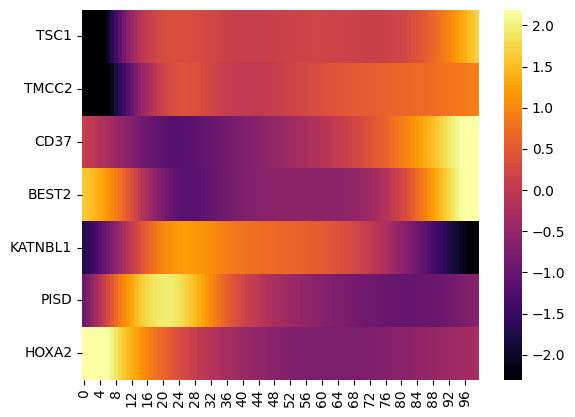

<IPython.core.display.Javascript object>

In [11]:
# Select some representative genes
select_rna_small = scaled_rna_traj.T[
    ["TSC1", "TMCC2", "CD37", "BEST2", "KATNBL1", "PISD", "HOXA2"]
].T
sns.heatmap(
    select_rna_small, cmap="inferno", robust=True,
)

In [12]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss


def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f"KPSS Statistic: {statistic}")
    print(f"p-value: {p_value}")
    print(f"num lags: {n_lags}")
    print("Critial Values:")
    for key, value in critical_values.items():
        print(f"   {key} : {value}")
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


from statsmodels.tsa.stattools import grangercausalitytests

lag_order = 1
maxlag = (
    lag_order,  # becuase we got this value before. We are not suppose to add 1 to it
)
test = "ssr_chi2test"


def grangers_causation_matrix(data, variables, test="ssr_chi2test", verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(
        np.zeros((len(variables), len(variables))), columns=variables, index=variables
    )
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(
                data[[r, c]], maxlag=maxlag, verbose=False
            )
            # print(test_result)
            p_values = [test_result[i][0][test][1] for i in maxlag]
            if verbose:
                print(f"Y = {r}, X = {c}, P Values = {p_values}")
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + "_x" for var in variables]
    df.index = [var + "_y" for var in variables]
    return df

<IPython.core.display.Javascript object>

<AxesSubplot: >

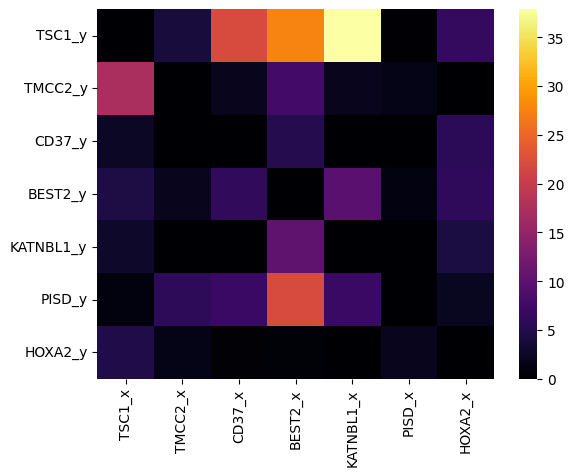

<IPython.core.display.Javascript object>

In [13]:
raw_select_rna_small = select_rna_small.copy(deep=True)
select_rna_stat_small = select_rna_small.iloc[:, ::10].T - select_rna_small.iloc[
    :, ::10
].T.shift(1)
select_rna_stat_small = select_rna_stat_small.dropna()

out_small = grangers_causation_matrix(
    select_rna_stat_small, variables=select_rna_stat_small.columns
)
out_small
sns.heatmap(-np.log(out_small), cmap="inferno")

In [14]:
tfs = [s[:-2] for s in pd.read_pickle("tf_tf_all.pkl").columns]
genes_select = np.array([s[:-2] for s in pd.read_pickle("tf_var_all.pkl").columns])
diff_genes_select = np.array([s[:-2] for s in pd.read_pickle("tf_diff_all.pkl").columns])

<IPython.core.display.Javascript object>

In [17]:
# Place the masks in the adata object
adata.var["select_tfs"] = adata.var.index.isin(tfs)
adata.var["select_genes"] = adata.var.index.isin(genes_select)
adata.var["select_diff_genes"] = adata.var.index.isin(diff_genes_select)
#adata.var["tfs"] = adata.var.index.isin(full_tfs)

<IPython.core.display.Javascript object>

In [18]:
def grangers_causation_matrix(
    data, in_variables, out_variables, test="ssr_chi2test", verbose=False
):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(
        np.zeros((len(in_variables), len(out_variables))),
        columns=out_variables,
        index=in_variables,
    )
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(
                data[[r, c]], maxlag=maxlag, verbose=False
            )
            # print(test_result)
            p_values = [test_result[i][0][test][1] for i in maxlag]
            if verbose:
                print(f"Y = {r}, X = {c}, P Values = {p_values}")
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.index = [var + "_x" for var in in_variables]
    df.columns = [var + "_y" for var in out_variables]
    return df

<IPython.core.display.Javascript object>

In [19]:
from joblib import Parallel, delayed


def grangers_causation_matrix(
    data, in_variables, out_variables, test="ssr_chi2test", verbose=False
):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """

    def get_pval(dd):
        test_result = grangercausalitytests(dd, maxlag=maxlag, verbose=False)
        p_values = [test_result[i][0][test][1] for i in maxlag]
        min_p_value = np.min(p_values)
        return min_p_value

    out = Parallel(n_jobs=1)(
        delayed(get_pval)(data[[r, c]]) for c in out_variables for r in in_variables
    )
    # Note that this is the wrong way and must be corrected
    df = pd.DataFrame(
        np.array(out).reshape((len(in_variables), len(out_variables))),
        columns=out_variables,
        index=in_variables,
    )
    df.index = [var + "_x" for var in in_variables]
    df.columns = [var + "_y" for var in out_variables]
    return df

<IPython.core.display.Javascript object>

In [20]:
scaled_rna_traj.shape, traj_mes.shape, traj_epi.shape


((21465, 100), (21465, 100), (21465, 100))

<IPython.core.display.Javascript object>

In [21]:
def do_granger(trajs, in_genes, out_genes):
    trajs = trajs.T[::10]
    trajs = trajs - trajs.shift(1)
    trajs = trajs.dropna()
    out_traj = grangers_causation_matrix(
        trajs, in_variables=in_genes, out_variables=out_genes,
    )
    return out_traj

<IPython.core.display.Javascript object>

In [38]:
adata.var.sum()

/tmp/ipykernel_14308/300245175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  adata.var.sum()


gene_ids                  ENSG00000238009ENSG00000237491ENSG00000177757E...
n_counts                                                        516313632.0
is_emt                                                                   65
n_cells_by_counts                                                  60694110
mean_counts                                                     4723.528809
log1p_mean_counts                                               3280.237061
pct_dropout_by_counts                                        1789160.523992
total_counts                                                     80229136.0
log1p_total_counts                                            130391.914062
is_zero                                                                  61
highly_variable                                                        1999
means                                                           6547.933938
dispersions                                                    13313.893124
dispersions_

<IPython.core.display.Javascript object>

In [40]:
adata_sub = adata[:, adata.var.index[adata.var.select_tfs | adata.var.select_genes]]

<IPython.core.display.Javascript object>

In [41]:
adata_sub

View of AnnData object with n_obs × n_vars = 16985 × 2223
    obs: 'n_counts', 'batch', 'day', 'new', 'sample_id', 'growth', 'log_growth', 'sample_labels', 'louvain', 'S_score', 'G2M_score', 'phase', 'emt_scores', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'is_emt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'is_zero', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'is_tf', 'traj_kmeans_clusters', 'combined_kmeans_labels', 'select_tfs', 'select_genes', 'select_diff_genes'
    uns: 'emt_weights', 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'sample_id_colors', 'trajectory_clusters'
    obsm: 'X_pca', 'X_phate'
    varm: 'PCs'
    obsp: 'connectivit

<IPython.core.display.Javascript object>

In [42]:
df = pd.DataFrame(adata_sub.X.toarray(), index=adata_sub.obs.index, columns=adata_sub.var.index)

<IPython.core.display.Javascript object>

In [43]:
corr = df.iloc[:10,:5].corr()

<IPython.core.display.Javascript object>

In [45]:
corr = df.corr()

<IPython.core.display.Javascript object>

In [46]:
corr.shape

(2223, 2223)

<IPython.core.display.Javascript object>

In [48]:
corr

,NOC2L,HES4,ISG15,ERRFI1,ENO1,PGD,CENPS,SRM,PLOD1,EFHD2,...,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
NOC2L,1.000000,0.025158,0.022078,-0.008920,0.109396,0.009496,0.002998,0.050363,0.009138,-0.002429,...,0.032244,0.037301,0.047813,0.045878,0.053046,0.028260,0.048845,0.040305,0.050900,0.053124
HES4,0.025158,1.000000,0.003901,-0.033064,0.013772,0.001993,0.063916,0.105861,0.027615,0.010115,...,-0.047619,-0.042748,-0.055123,-0.041738,-0.062199,-0.006740,-0.043628,-0.044577,-0.005287,-0.064420
ISG15,0.022078,0.003901,1.000000,-0.059883,0.005033,-0.023312,0.004659,-0.004653,0.025966,0.047761,...,-0.075074,-0.048614,-0.035425,-0.063583,0.040297,0.011969,-0.027530,-0.067755,0.004090,-0.034139
ERRFI1,-0.008920,-0.033064,-0.059883,1.000000,-0.051109,0.058937,0.055196,0.104037,-0.036516,0.122519,...,0.007029,0.038240,-0.063321,-0.045690,-0.198473,-0.058601,-0.061849,0.004374,-0.083579,-0.051946
ENO1,0.109396,0.013772,0.005033,-0.051109,1.000000,0.152838,0.013033,0.054138,0.031330,0.027428,...,-0.196316,-0.257515,-0.160875,-0.149887,-0.126124,-0.085601,-0.209170,-0.161572,-0.030280,-0.162542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,0.028260,-0.006740,0.011969,-0.058601,-0.085601,-0.078109,-0.035979,-0.059743,0.044622,-0.042752,...,0.249222,0.272416,0.335514,0.268800,0.325421,1.000000,0.331536,0.292008,0.154814,0.293716
MT-ND4,0.048845,-0.043628,-0.027530,-0.061849,-0.209170,-0.130414,-0.068822,-0.165763,0.110706,-0.116483,...,0.709162,0.878268,0.800246,0.849271,0.730950,0.331536,1.000000,0.632216,0.349860,0.883049
MT-ND5,0.040305,-0.044577,-0.067755,0.004374,-0.161572,-0.054614,-0.058608,-0.098325,0.048126,-0.067485,...,0.554958,0.594002,0.604922,0.568440,0.470710,0.292008,0.632216,1.000000,0.204733,0.608566
MT-ND6,0.050900,-0.005287,0.004090,-0.083579,-0.030280,-0.175050,-0.114616,-0.125498,0.056831,-0.144258,...,0.289814,0.332669,0.348295,0.391222,0.434383,0.154814,0.349860,0.204733,1.000000,0.353249


<IPython.core.display.Javascript object>

In [49]:
corr.loc[adata_sub.var.select_tfs, adata_sub.var.select_genes]

,NOC2L,HES4,ISG15,ERRFI1,ENO1,PGD,CENPS,SRM,PLOD1,EFHD2,...,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
HES4,0.025158,1.000000,0.003901,-0.033064,0.013772,0.001993,0.063916,0.105861,0.027615,0.010115,...,-0.047619,-0.042748,-0.055123,-0.041738,-0.062199,-0.006740,-0.043628,-0.044577,-0.005287,-0.064420
CENPS,0.002998,0.063916,0.004659,0.055196,0.013033,0.141341,1.000000,0.184140,-0.012343,0.178051,...,-0.143717,-0.073054,-0.109158,-0.138358,-0.190742,-0.035979,-0.068822,-0.058608,-0.114616,-0.127426
RUNX3,0.014069,0.143290,-0.070007,0.021812,0.075324,0.146573,0.108584,0.118173,-0.003743,0.026459,...,-0.055699,-0.053851,-0.068205,-0.038779,-0.193000,-0.060846,-0.059286,-0.013541,-0.097449,-0.080094
AHDC1,0.001432,-0.002015,0.011633,-0.012353,-0.034030,-0.015843,-0.015158,-0.013355,0.023189,-0.024982,...,0.043509,0.042311,0.041566,0.040317,0.048534,0.012631,0.040546,0.025824,0.014076,0.045397
ZBTB8A,0.015083,0.017774,-0.012586,-0.019813,-0.012219,-0.006293,0.011970,-0.014029,0.011943,-0.015940,...,0.026399,0.025546,0.032357,0.031222,0.029531,0.009251,0.023153,0.004498,0.017358,0.030253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GABPA,0.017683,-0.014616,0.011467,0.002671,0.036968,0.016181,-0.015130,-0.050663,0.025954,-0.013445,...,0.040804,0.004164,0.018176,0.033409,0.024473,-0.013952,0.005027,0.002873,0.021908,0.026660
BACH1,0.003345,-0.004655,-0.009549,0.063872,-0.018882,0.040819,0.009769,0.024999,-0.011165,0.038402,...,0.004345,-0.002831,-0.030593,-0.025158,-0.069551,-0.016798,-0.025651,-0.000286,-0.014813,-0.020582
SON,0.056487,-0.058051,0.012077,-0.074621,0.022864,-0.036366,-0.066321,-0.234953,0.068910,-0.080365,...,0.314733,0.173460,0.273906,0.289042,0.338818,0.121935,0.207133,0.161656,0.125786,0.282649
RUNX1,0.012491,0.023389,0.011314,0.030952,-0.015127,0.046388,0.052139,0.013915,-0.003375,0.081393,...,-0.020540,0.003530,-0.031096,-0.043461,-0.047031,0.002821,-0.013589,-0.003242,-0.045073,-0.023187


<IPython.core.display.Javascript object>

In [32]:
corr = scaled_rna_traj.T.corr()

<IPython.core.display.Javascript object>

In [ ]:
sns.clustermap(corr)

/home/mila/a/alexander.tong/.conda/envs/trajectory-inference/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


In [ ]:
corr[

In [ ]:
# Correlation 
do_corr(
    scaled_rna_traj
    in_genes="select_tfs"
    out_genes="select_tfs"
)

In [72]:
tf_var_all = pd.read_pickle("tf_var_all.pkl")

tf_var_all = -np.log(tf_var_all + 2 ** -10) * np.sign(corr.loc[adata_sub.var.select_tfs, adata_sub.var.select_genes]).values

<IPython.core.display.Javascript object>

/home/mila/a/alexander.tong/.conda/envs/trajectory-inference/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


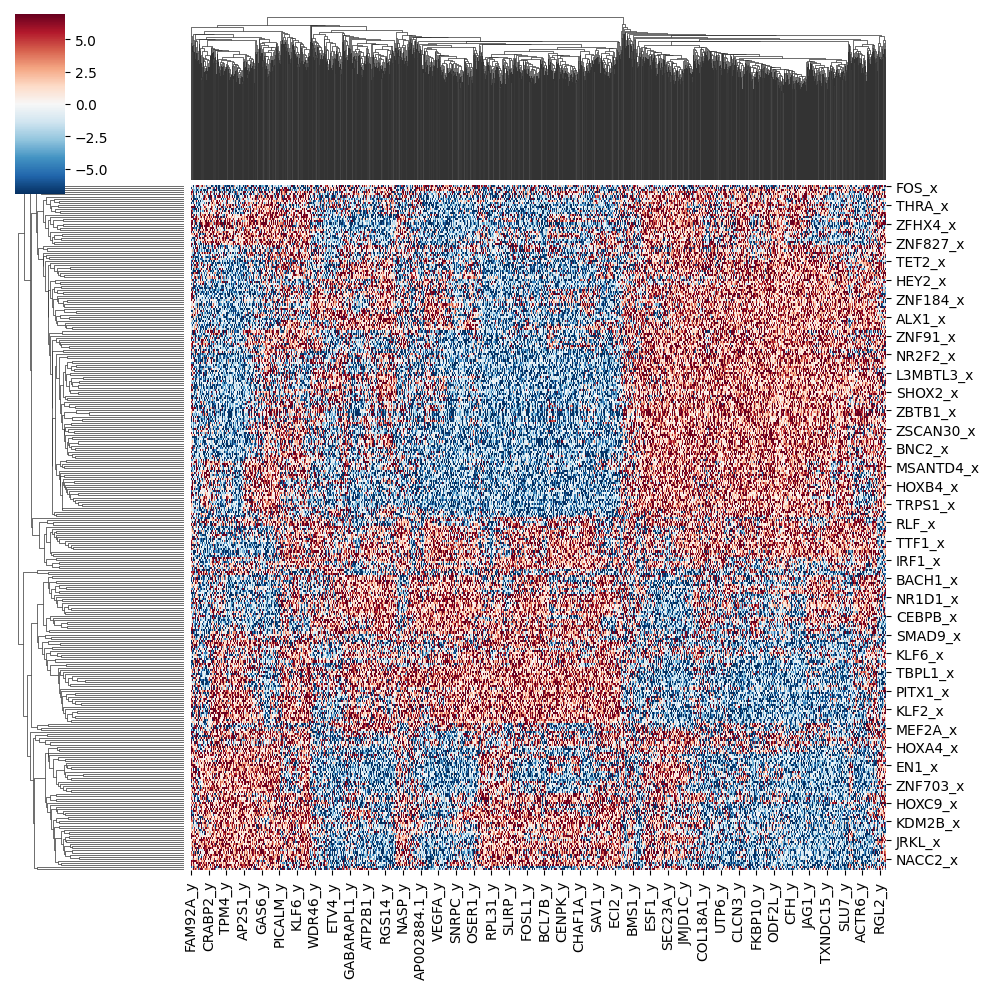

<IPython.core.display.Javascript object>

In [73]:
sns.clustermap(tf_var_all, cmap="RdBu_r", center=0)

In [ ]:
sns.clustermap(tf_var_all, cmap="RdBu_r", center=0)

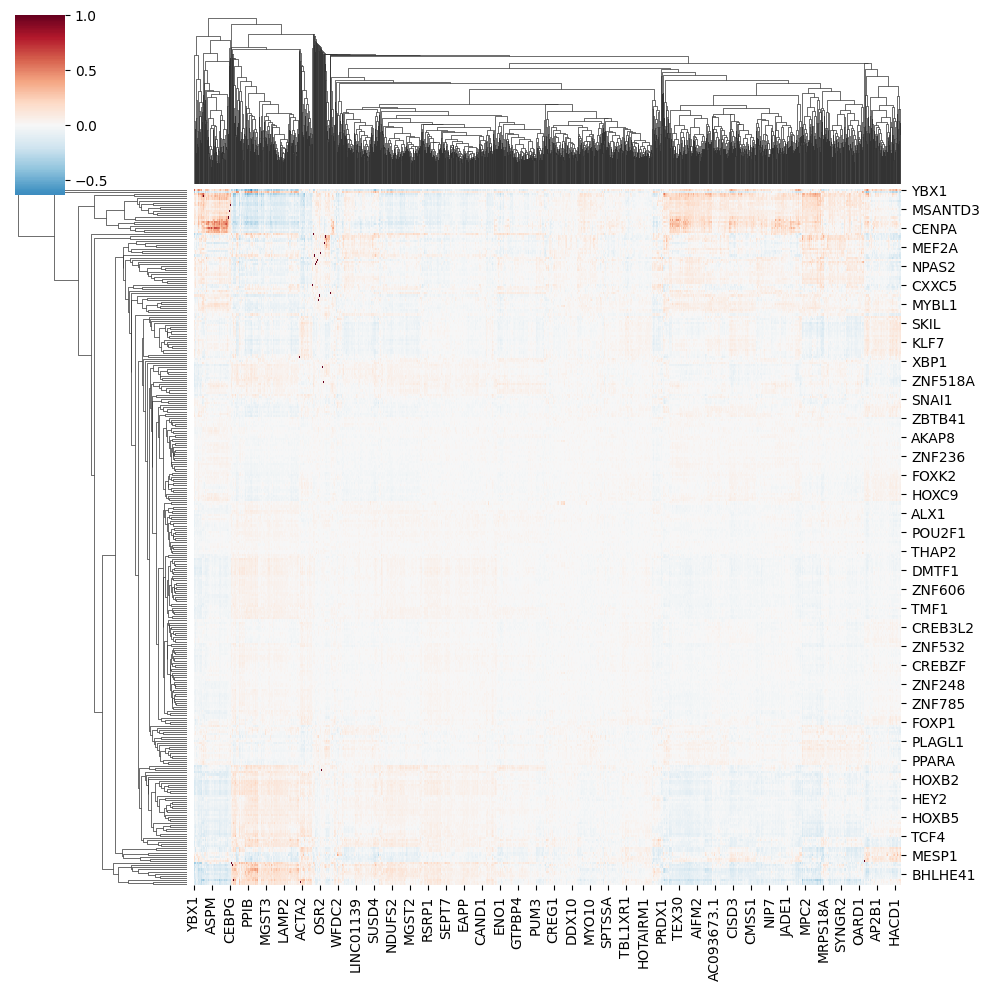

<IPython.core.display.Javascript object>

In [68]:
sns.clustermap(corr.loc[adata_sub.var.select_tfs, adata_sub.var.select_genes], cmap="RdBu_r", center=0)

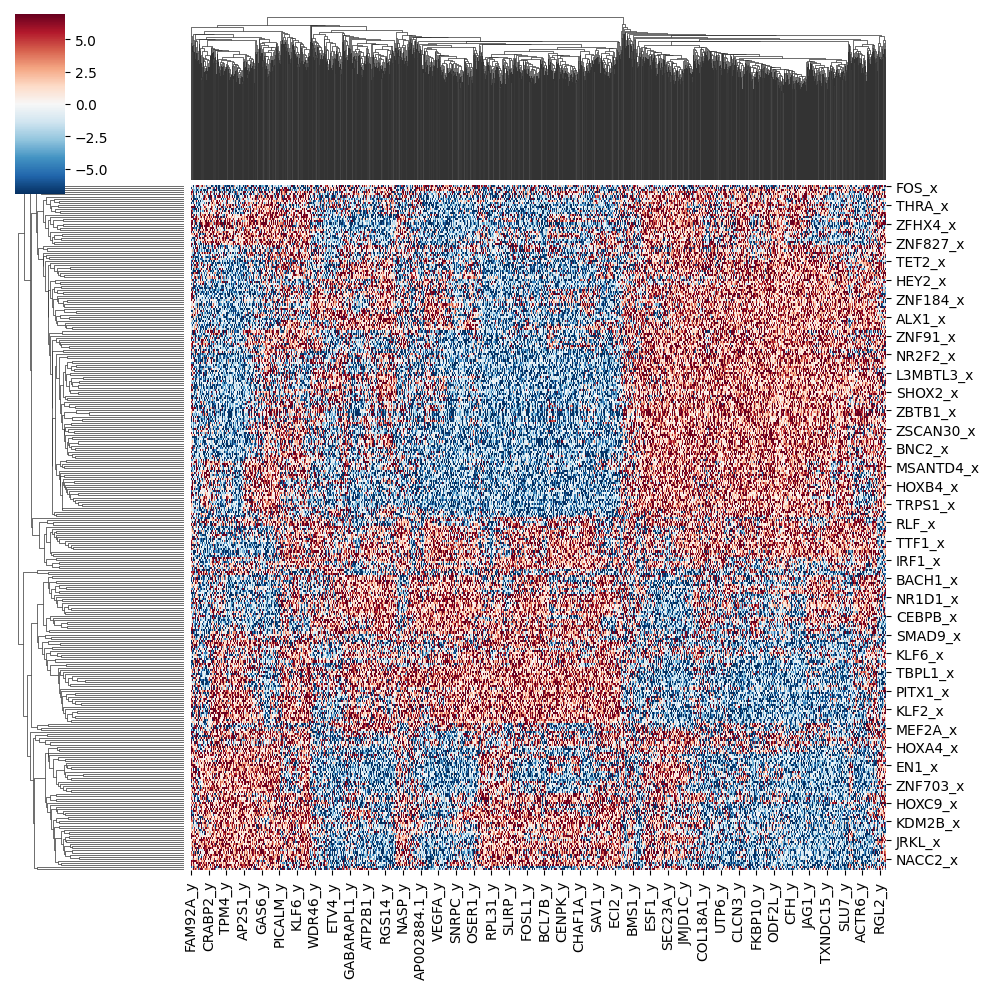

<IPython.core.display.Javascript object>

In [77]:
sns.clustermap(tf_var_all, cmap="RdBu_r", center=0)

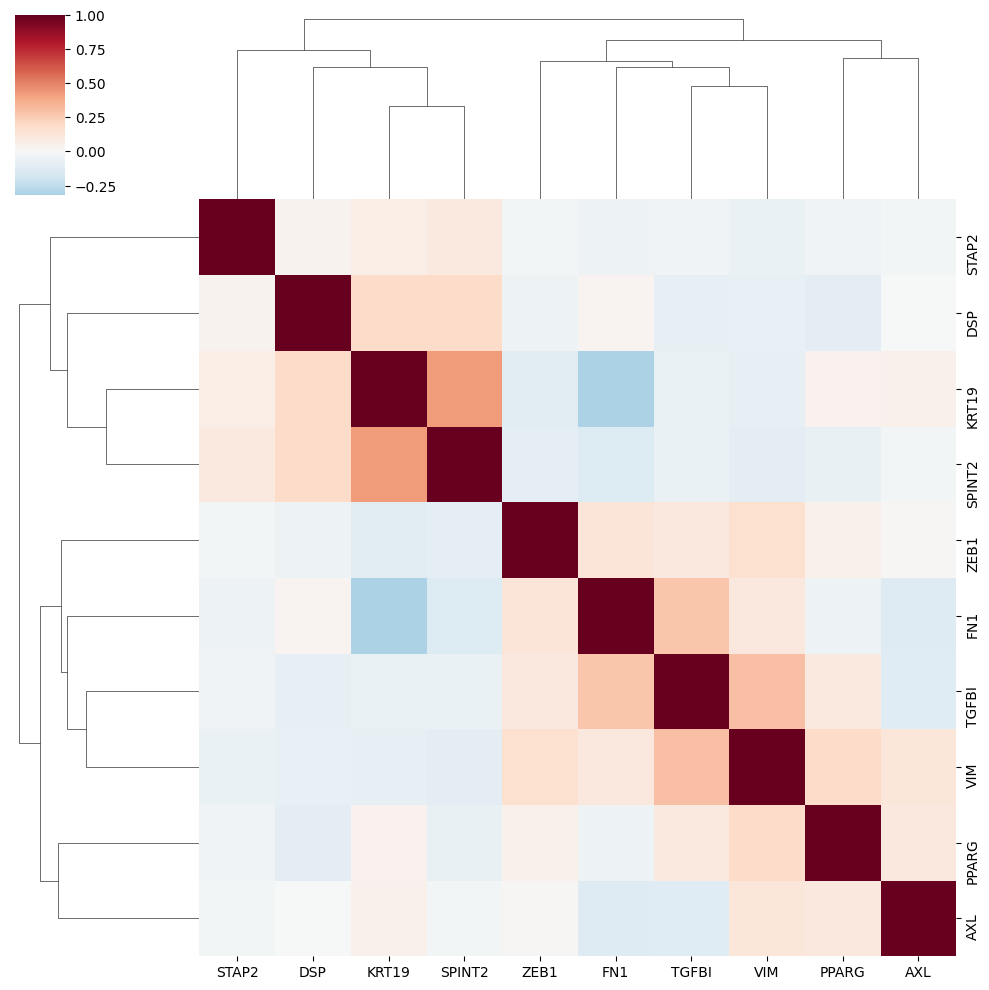

<IPython.core.display.Javascript object>

In [75]:
sns.clustermap(corr.loc[adata_sub.var.is_emt, adata_sub.var.is_emt], cmap="RdBu_r", center=0)

In [78]:
tf_emt_epi = pd.read_pickle("tf_emt_epi.pkl")

<IPython.core.display.Javascript object>

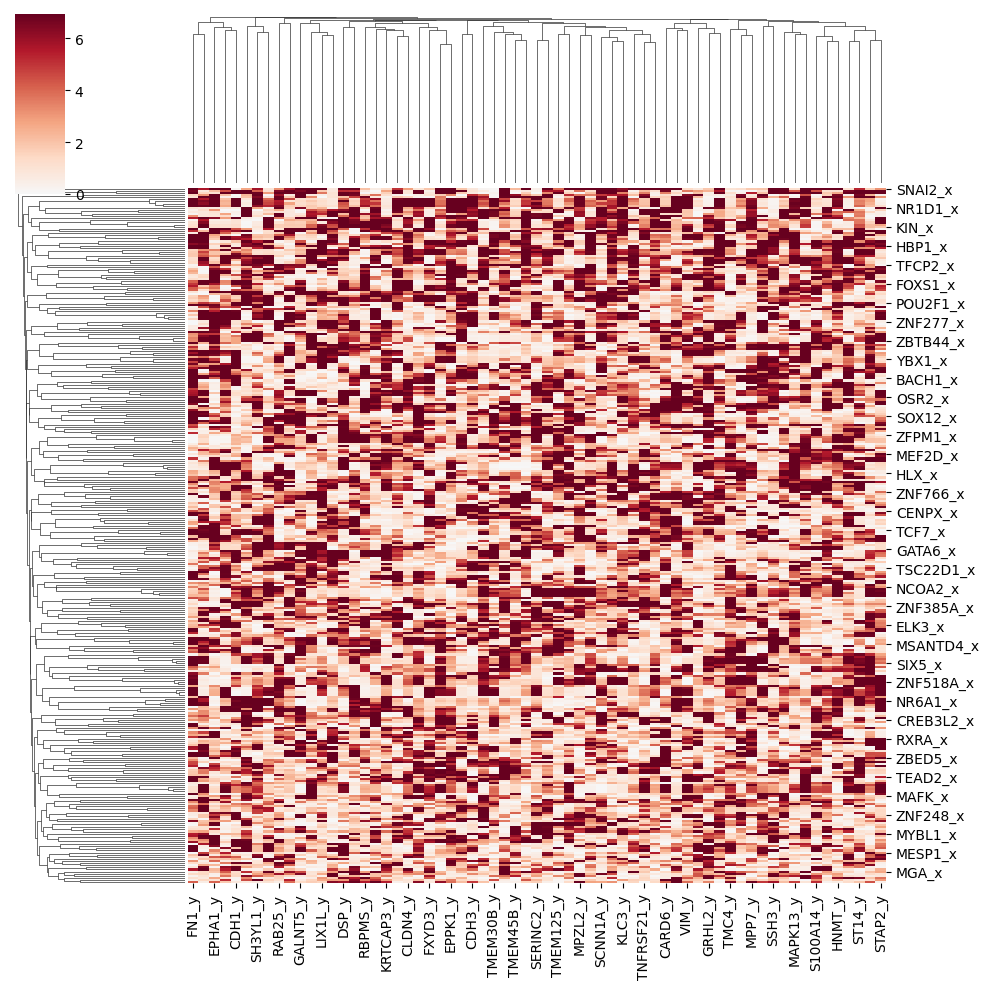

<IPython.core.display.Javascript object>

In [81]:
sns.clustermap(-np.log(tf_emt_epi + 2 ** -10) * np.sign(, cmap="RdBu_r", center=0)

In [29]:
%%time
tf_tf_all = do_granger(
    scaled_rna_traj,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_tfs"]],
)

CPU times: user 2min 39s, sys: 122 ms, total: 2min 40s
Wall time: 2min 41s


<IPython.core.display.Javascript object>

In [55]:
%%time
tf_tf_epi = do_granger(
    traj_epi,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_tfs"]],
)

CPU times: user 4min 7s, sys: 11.1 s, total: 4min 18s
Wall time: 4min 10s


<IPython.core.display.Javascript object>

In [56]:
%%time
tf_tf_mes = do_granger(
    traj_mes,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_tfs"]],
)

CPU times: user 3min 35s, sys: 8.21 s, total: 3min 44s
Wall time: 3min 37s


<IPython.core.display.Javascript object>

In [57]:
tf_tf_all.to_pickle("tf_tf_all.pkl")
tf_tf_epi.to_pickle("tf_tf_epi.pkl")
tf_tf_mes.to_pickle("tf_tf_mes.pkl")

<IPython.core.display.Javascript object>

In [90]:
%%time
tf_emt_all = do_granger(
    scaled_rna_traj,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["is_emt"]],
)

CPU times: user 2min 18s, sys: 8.32 s, total: 2min 26s
Wall time: 2min 21s


<IPython.core.display.Javascript object>

In [91]:
%%time
tf_emt_epi = do_granger(
    traj_epi,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["is_emt"]],
)

CPU times: user 1min 7s, sys: 3.7 s, total: 1min 11s
Wall time: 1min 9s


<IPython.core.display.Javascript object>

In [92]:
%%time
tf_emt_mes = do_granger(
    traj_mes,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["is_emt"]],
)

CPU times: user 48.5 s, sys: 2.46 s, total: 51 s
Wall time: 49.8 s


<IPython.core.display.Javascript object>

In [93]:
tf_emt_all.to_pickle("tf_emt_all.pkl")
tf_emt_epi.to_pickle("tf_emt_epi.pkl")
tf_emt_mes.to_pickle("tf_emt_mes.pkl")

<IPython.core.display.Javascript object>

In [ ]:
tf_var_all = do_granger(
    scaled_rna_traj,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_genes"]],
)
tf_var_all.to_pickle("tf_var_all.pkl")

In [ ]:
%%time
tf_var_epi = do_granger(
    traj_epi,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_genes"]],
)
tf_var_epi.to_pickle("tf_var_epi.pkl")

In [ ]:
%%time
tf_var_mes = do_granger(
    traj_mes,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_genes"]],
)
tf_var_mes.to_pickle("tf_var_mes.pkl")

In [ ]:
%%time
tf_diff_all = do_granger(
    scaled_rna_traj,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_diff_genes"]],
)
tf_diff_all.to_pickle("tf_diff_all.pkl")

In [ ]:
%%time
tf_diff_epi = do_granger(
    traj_epi,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_diff_genes"]],
)
tf_diff_epi.to_pickle("tf_diff_epi.pkl")

In [ ]:
%%time
tf_diff_mes = do_granger(
    traj_mes,
    in_genes=adata.var.index[adata.var["select_tfs"]],
    out_genes=adata.var.index[adata.var["select_diff_genes"]],
)
tf_diff_mes.to_pickle("tf_diff_mes.pkl")

In [59]:
paths = [s for s in os.listdir() if s.endswith(".pkl") and s.startswith("tf")]

<IPython.core.display.Javascript object>

In [60]:
dfs = [pd.read_pickle(s) for s in paths]

<IPython.core.display.Javascript object>

In [61]:
new = []
for df in dfs:
    a = df.values
    b = a.reshape(a.shape[1], a.shape[0]).T
    new.append(pd.DataFrame(b, columns=df.columns, index=df.index))

<IPython.core.display.Javascript object>

In [62]:
[n.to_pickle("v2_%s" % s) for n, s in zip(new, paths)]

[None, None, None, None, None, None, None, None, None, None, None, None]

<IPython.core.display.Javascript object>

In [63]:
[s for s in os.listdir() if s.startswith("v2")]

['v2_tf_diff_all.pkl',
 'v2_tf_tf_epi.pkl',
 'v2_tf_emt_mes.pkl',
 'v2_tf_var_epi.pkl',
 'v2_tf_tf_all.pkl',
 'v2_tf_var_all.pkl',
 'v2_tf_diff_mes.pkl',
 'v2_tf_emt_all.pkl',
 'v2_tf_tf_mes.pkl',
 'v2_tf_emt_epi.pkl',
 'v2_tf_diff_epi.pkl',
 'v2_tf_var_mes.pkl']

<IPython.core.display.Javascript object>

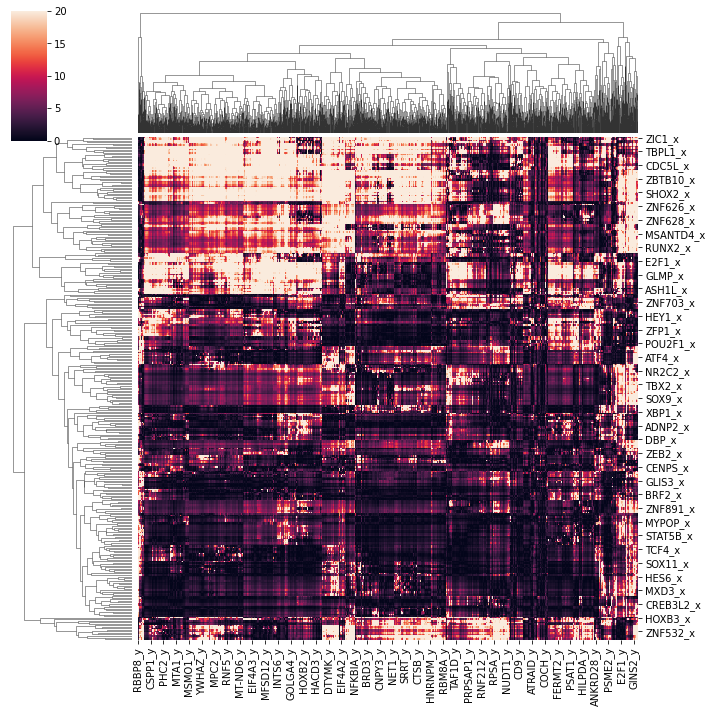

<IPython.core.display.Javascript object>

In [24]:
sns.clustermap(-np.log2(new[0] + (2 ** -20)))

In [ ]:
!mail -s "finished" alexanderytong@gmail.com </dev/null


In [ ]:
!mail -s "Granger things are finished" manik.kuchroo@yale.edu </dev/null

In [88]:
out_traj

<IPython.core.display.Javascript object>

In [81]:
out_traj

<IPython.core.display.Javascript object>

In [49]:
len(adata.var.index[adata.var["select_tfs"]])

330

<IPython.core.display.Javascript object>

In [52]:
adata.var["is_emt"]

AL627309.1    False
AL669831.5    False
FAM87B        False
LINC00115     False
FAM41C        False
              ...  
AL592183.1    False
AC007325.4    False
AL354822.1    False
AC004556.1    False
AC240274.1    False
Name: is_emt, Length: 21465, dtype: bool

<IPython.core.display.Javascript object>